In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../data')
from data_loading import *

from Model import *

fname = "../data/up_down/100GEV-downquark-seed1.txt"

jets = jets_from_pythia_txt(fname)
print("Number of jets in file: ", len(jets))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of jets in file:  10000


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from JetImages import JetImage


total_num_jets = len(jets)
jet_images     = np.empty((total_num_jets, 2, JetImage.pixels_per_dim, JetImage.pixels_per_dim))

kappa = 0.2
for i, jet in enumerate(jets):
    image = JetImage.normalized_two_channel_image(jet, kappa)
    jet_images[i,:,:,:] = image

In [49]:
# Normalize the whole image by the sum of its pixels in each channel
normalized_images = jet_images / np.sum(jet_images, axis=(1,2,3), keepdims=True)

# Center each channel by the channel-average over all images
zero_centered_images = normalized_images - np.mean(normalized_images, axis=(0), keepdims=True)

# Standardize each channel by the channel-standard-deviation over all images
for_noise_reduction = 1e-5
standardized_images = zero_centered_images / (np.std(zero_centered_images, axis=(0), keepdims=True) + for_noise_reduction)

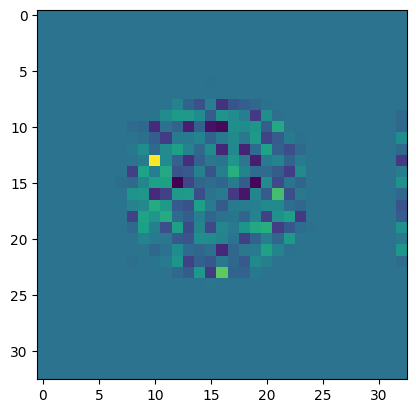

In [55]:
# m = normalized_images
# m = zero_centered_images
m = standardized_images

plt.imshow(np.mean(m, axis=0)[0,:,:])